In [1]:
import numpy as np
import pandas as pd
import gzip
from rdkit import DataStructs
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem.inchi import MolToInchiKey

RDLogger.DisableLog('rdApp.error')

In [2]:
df = np.load('df.npy', allow_pickle=True)
df = pd.DataFrame(df)
df.columns = ['Mol', 'Source', 'FP']
df

Mol    Source  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369230>  DrugBank   
1     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369f70>  DrugBank   
2     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369e70>  DrugBank   
3     <rdkit.Chem.rdchem.Mol object at 0x7f2b6ba129f0>  DrugBank   
4     <rdkit.Chem.rdchem.Mol object at 0x7f2b67dc3e70>  DrugBank   
...                                                ...       ...   
7908  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b91b0>   actives   
7909  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b92b0>   actives   
7910  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b93b0>   actives   
7911  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b94b0>   actives   
7912  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b95b0>   actives   

                                                     FP  
0     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
3     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
...                                                 ...  
7908  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7909  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7910  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7911  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7912  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[7913 rows x 3 columns]

In [3]:
from rdkit import DataStructs

def distance_function(i1, i2):
    return 1 - DataStructs.TanimotoSimilarity(df.FP[i1], df.FP[i2])

In [4]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(df.FP), 100))
picked

[3227,
 140,
 318,
 441,
 477,
 645,
 850,
 1198,
 1199,
 1202,
 1378,
 1379,
 2610,
 2784,
 3949,
 4637,
 4663,
 6852,
 6866,
 6873,
 6876,
 6982,
 6996,
 7010,
 7017,
 7018,
 7042,
 1308,
 3862,
 2152,
 2695,
 3663,
 3762,
 1844,
 1045,
 5676,
 2366,
 2357,
 7886,
 2771,
 5574,
 2139,
 676,
 1188,
 1757,
 3899,
 4362,
 2433,
 375,
 215,
 1384,
 1488,
 1860,
 2557,
 3519,
 2127,
 3887,
 4119,
 4948,
 885,
 2819,
 2945,
 2966,
 6167,
 303,
 2159,
 3881,
 4468,
 80,
 5673,
 6182,
 3700,
 401,
 2556,
 5018,
 416,
 5318,
 4373,
 6638,
 760,
 1849,
 7108,
 3435,
 5244,
 6971,
 4589,
 1991,
 3965,
 5110,
 7209,
 3450,
 4970,
 3830,
 6805,
 400,
 2734,
 3602,
 3996,
 5578,
 6061]

In [5]:
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

df['MW'] = df['Mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['rings'] = df['Mol'].apply(lambda x: Chem.GetSSSR(x))
df['HBA'] = df['Mol'].apply(lambda x: Lipinski.NumHAcceptors(x))
df['HBD'] = df['Mol'].apply(lambda x: Lipinski.NumHDonors(x))
df['logP'] = df['Mol'].apply(lambda x: Descriptors.MolLogP(x))
df['TPSA'] = df['Mol'].apply(lambda x: Descriptors.TPSA(x))
df['RB'] = df['Mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
df

Mol    Source  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369230>  DrugBank   
1     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369f70>  DrugBank   
2     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369e70>  DrugBank   
3     <rdkit.Chem.rdchem.Mol object at 0x7f2b6ba129f0>  DrugBank   
4     <rdkit.Chem.rdchem.Mol object at 0x7f2b67dc3e70>  DrugBank   
...                                                ...       ...   
7908  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b91b0>   actives   
7909  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b92b0>   actives   
7910  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b93b0>   actives   
7911  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b94b0>   actives   
7912  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b95b0>   actives   

                                                     FP           MW  rings  \
0     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  2178.985813      6   
1     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1268.641439      6   
2     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  1068.426955      4   
3     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1429.669818      6   
4     [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  1201.841368      1   
...                                                 ...          ...    ...   
7908  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   357.089560      4   
7909  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   288.060234      1   
7910  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   405.216475      4   
7911  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   405.216475      4   
7912  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   373.073242      4   

      HBA  HBD     logP    TPSA  RB  
0      29   28 -8.11643  901.57  66  
1      16   17 -3.10570  495.89  31  
2      15   14 -4.13203  435.41  19  
3      16   17 -0.50613  495.67  38  
4      12    5  3.26900  278.80  15  
...   ...  ...      ...     ...  ..  
7908    6    2  0.86340  123.73   3  
7909    6    1  2.53530   68.29   4  
7910    3    3  4.13040   90.12   6  
7911    3    3  4.13040   90.12   6  
7912    5    3  1.12840  117.36   3  

[7913 rows x 10 columns]

In [6]:
def picked_flag(x):
    if x in picked:
        return 'picked'
    else:
        return 'not-picked'
    
df['in'] = df.index
df['picked'] = df['in'].apply(lambda x: picked_flag(x))

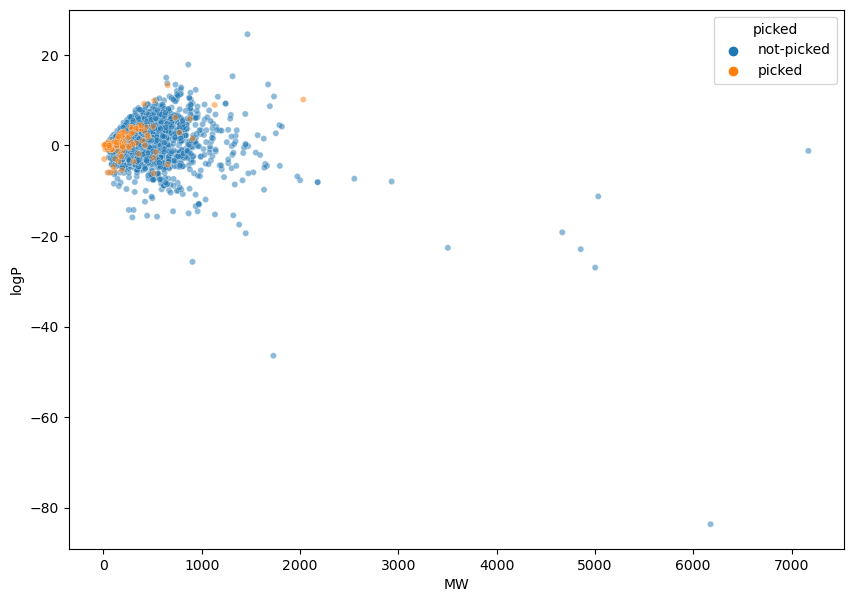

In [7]:
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='MW',
    y='logP',
    data=df.sort_values('picked'),
    hue='picked',
    legend='brief',
    ax=ax,
    alpha=0.5,
    s=20
)

In [8]:
from sklearn.manifold import TSNE

D = pd.DataFrame(np.load('dist_matrix.npy'))
ts = TSNE(metric='precomputed', init='random').fit_transform(D)
ts



/home/vmelichar/anaconda3/envs/PNL/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/vmelichar/anaconda3/envs/PNL/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


array([[-1.8124727,  2.1791074],
       [-1.7824749,  2.153353 ],
       [-1.4628007,  2.7094126],
       ...,
       [-2.6398444,  1.5531361],
       [-2.6297421,  1.5532563],
       [ 0.5232309, -1.5646688]], dtype=float32)

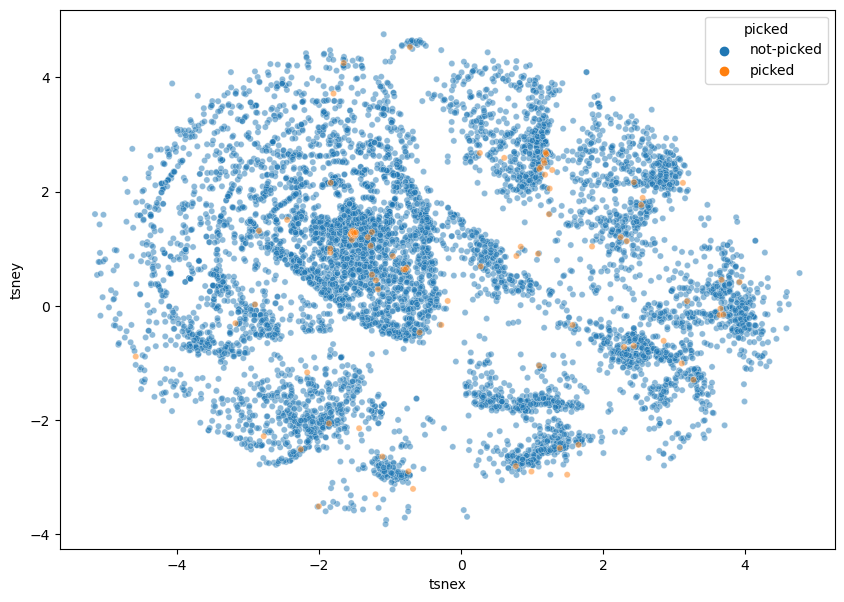

In [9]:
df2 = df.join(pd.DataFrame(ts, columns=('tsnex', 'tsney')))

fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='tsnex',
    y='tsney',
    data=df2.sort_values('picked'),
    hue='picked',
    legend='brief',
    ax=ax,
    alpha=0.5,
    s=20
)

In [10]:
df

Mol    Source  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369230>  DrugBank   
1     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369f70>  DrugBank   
2     <rdkit.Chem.rdchem.Mol object at 0x7f2b8a369e70>  DrugBank   
3     <rdkit.Chem.rdchem.Mol object at 0x7f2b6ba129f0>  DrugBank   
4     <rdkit.Chem.rdchem.Mol object at 0x7f2b67dc3e70>  DrugBank   
...                                                ...       ...   
7908  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b91b0>   actives   
7909  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b92b0>   actives   
7910  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b93b0>   actives   
7911  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b94b0>   actives   
7912  <rdkit.Chem.rdchem.Mol object at 0x7f2b674b95b0>   actives   

                                                     FP           MW  rings  \
0     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  2178.985813      6   
1     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1268.641439      6   
2     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  1068.426955      4   
3     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  1429.669818      6   
4     [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  1201.841368      1   
...                                                 ...          ...    ...   
7908  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   357.089560      4   
7909  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   288.060234      1   
7910  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   405.216475      4   
7911  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   405.216475      4   
7912  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   373.073242      4   

      HBA  HBD     logP    TPSA  RB    in      picked  
0      29   28 -8.11643  901.57  66     0  not-picked  
1      16   17 -3.10570  495.89  31     1  not-picked  
2      15   14 -4.13203  435.41  19     2  not-picked  
3      16   17 -0.50613  495.67  38     3  not-picked  
4      12    5  3.26900  278.80  15     4  not-picked  
...   ...  ...      ...     ...  ..   ...         ...  
7908    6    2  0.86340  123.73   3  7908  not-picked  
7909    6    1  2.53530   68.29   4  7909  not-picked  
7910    3    3  4.13040   90.12   6  7910  not-picked  
7911    3    3  4.13040   90.12   6  7911  not-picked  
7912    5    3  1.12840  117.36   3  7912  not-picked  

[7913 rows x 12 columns]

-----------------------------------

# EX 11

In [17]:
df = np.load('df.npy', allow_pickle=True)
df = pd.DataFrame(df)
df.columns = ['Mol', 'Source', 'FP']
df.drop(columns=['FP'], inplace=True)
df

Mol    Source
0     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061170>  DrugBank
1     <rdkit.Chem.rdchem.Mol object at 0x7f2b600611f0>  DrugBank
2     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061070>  DrugBank
3     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061430>  DrugBank
4     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061d70>  DrugBank
...                                                ...       ...
7908  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8755b0>   actives
7909  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8756b0>   actives
7910  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8757b0>   actives
7911  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8758b0>   actives
7912  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8759b0>   actives

[7913 rows x 2 columns]

In [18]:
# calculate MQN
from rdkit.Chem import rdMolDescriptors

df = df.join(pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in df["Mol"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

df

Mol    Source  MQN_1  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061170>  DrugBank     98   
1     <rdkit.Chem.rdchem.Mol object at 0x7f2b600611f0>  DrugBank     59   
2     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061070>  DrugBank     46   
3     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061430>  DrugBank     70   
4     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061d70>  DrugBank     62   
...                                                ...       ...    ...   
7908  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8755b0>   actives     16   
7909  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8756b0>   actives     11   
7910  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8757b0>   actives     23   
7911  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8758b0>   actives     23   
7912  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8759b0>   actives     17   

      MQN_2  MQN_3  MQN_4  MQN_5  MQN_6  MQN_7  MQN_8  ...  MQN_33  MQN_34  \
0         0      0      0      0      0      0     21  ...       0       0   
1         0      0      0      0      0      0     13  ...       0       0   
2         0      0      0      0      2      0      8  ...       0       0   
3         0      1      0      0      0      0     15  ...       0       0   
4         0      0      0      0      0      0      0  ...       0       0   
...     ...    ...    ...    ...    ...    ...    ...  ...     ...     ...   
7908      0      0      0      0      1      0      1  ...       0       0   
7909      0      0      0      0      2      0      1  ...       0       0   
7910      0      0      0      0      0      0      2  ...       0       0   
7911      0      0      0      0      0      0      2  ...       0       0   
7912      0      0      0      0      1      0      1  ...       0       0   

      MQN_35  MQN_36  MQN_37  MQN_38  MQN_39  MQN_40  MQN_41  MQN_42  
0          3       3       0       0       0       0       0       0  
1          4       2       0       0       0       0       2       1  
2          1       2       0       0       0       1       0       0  
3          1       5       0       0       0       0       2       1  
4          0       0       0       0       0       1       0       0  
...      ...     ...     ...     ...     ...     ...     ...     ...  
7908       2       2       0       0       0       0       4       2  
7909       1       0       0       0       0       0       0       0  
7910       2       2       0       0       0       0       4       2  
7911       2       2       0       0       0       0       4       2  
7912       2       2       0       0       0       0       4       2  

[7913 rows x 44 columns]

In [19]:
# normalize MQN columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df.loc[:, df.columns.str.startswith('MQN_')] = scaler.fit_transform(df.loc[:, df.columns.str.startswith('MQN_')])
df

Mol    Source     MQN_1  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061170>  DrugBank  0.417021   
1     <rdkit.Chem.rdchem.Mol object at 0x7f2b600611f0>  DrugBank  0.251064   
2     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061070>  DrugBank  0.195745   
3     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061430>  DrugBank  0.297872   
4     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061d70>  DrugBank  0.263830   
...                                                ...       ...       ...   
7908  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8755b0>   actives  0.068085   
7909  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8756b0>   actives  0.046809   
7910  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8757b0>   actives  0.097872   
7911  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8758b0>   actives  0.097872   
7912  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8759b0>   actives  0.072340   

      MQN_2     MQN_3  MQN_4  MQN_5     MQN_6  MQN_7     MQN_8  ...  MQN_33  \
0       0.0  0.000000    0.0    0.0  0.000000    0.0  0.291667  ...     0.0   
1       0.0  0.000000    0.0    0.0  0.000000    0.0  0.180556  ...     0.0   
2       0.0  0.000000    0.0    0.0  0.105263    0.0  0.111111  ...     0.0   
3       0.0  0.166667    0.0    0.0  0.000000    0.0  0.208333  ...     0.0   
4       0.0  0.000000    0.0    0.0  0.000000    0.0  0.000000  ...     0.0   
...     ...       ...    ...    ...       ...    ...       ...  ...     ...   
7908    0.0  0.000000    0.0    0.0  0.052632    0.0  0.013889  ...     0.0   
7909    0.0  0.000000    0.0    0.0  0.105263    0.0  0.013889  ...     0.0   
7910    0.0  0.000000    0.0    0.0  0.000000    0.0  0.027778  ...     0.0   
7911    0.0  0.000000    0.0    0.0  0.000000    0.0  0.027778  ...     0.0   
7912    0.0  0.000000    0.0    0.0  0.052632    0.0  0.013889  ...     0.0   

      MQN_34    MQN_35  MQN_36  MQN_37  MQN_38  MQN_39    MQN_40    MQN_41  \
0        0.0  0.081081    0.15     0.0     0.0     0.0  0.000000  0.000000   
1        0.0  0.108108    0.10     0.0     0.0     0.0  0.000000  0.035714   
2        0.0  0.027027    0.10     0.0     0.0     0.0  0.041667  0.000000   
3        0.0  0.027027    0.25     0.0     0.0     0.0  0.000000  0.035714   
4        0.0  0.000000    0.00     0.0     0.0     0.0  0.041667  0.000000   
...      ...       ...     ...     ...     ...     ...       ...       ...   
7908     0.0  0.054054    0.10     0.0     0.0     0.0  0.000000  0.071429   
7909     0.0  0.027027    0.00     0.0     0.0     0.0  0.000000  0.000000   
7910     0.0  0.054054    0.10     0.0     0.0     0.0  0.000000  0.071429   
7911     0.0  0.054054    0.10     0.0     0.0     0.0  0.000000  0.071429   
7912     0.0  0.054054    0.10     0.0     0.0     0.0  0.000000  0.071429   

        MQN_42  
0     0.000000  
1     0.015625  
2     0.000000  
3     0.015625  
4     0.000000  
...        ...  
7908  0.031250  
7909  0.000000  
7910  0.031250  
7911  0.031250  
7912  0.031250  

[7913 rows x 44 columns]

In [22]:
# do pca on MQN columns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.loc[:, df.columns.str.startswith('MQN_')])
pca_coord = pca.transform(df.loc[:, df.columns.str.startswith('MQN_')])

# add pca coordinates to df
df = df.join(pd.DataFrame(pca_coord, columns=('pca1', 'pca2')))
df

Mol    Source     MQN_1  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061170>  DrugBank  0.417021   
1     <rdkit.Chem.rdchem.Mol object at 0x7f2b600611f0>  DrugBank  0.251064   
2     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061070>  DrugBank  0.195745   
3     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061430>  DrugBank  0.297872   
4     <rdkit.Chem.rdchem.Mol object at 0x7f2b60061d70>  DrugBank  0.263830   
...                                                ...       ...       ...   
7908  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8755b0>   actives  0.068085   
7909  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8756b0>   actives  0.046809   
7910  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8757b0>   actives  0.097872   
7911  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8758b0>   actives  0.097872   
7912  <rdkit.Chem.rdchem.Mol object at 0x7f2b3d8759b0>   actives  0.072340   

      MQN_2     MQN_3  MQN_4  MQN_5     MQN_6  MQN_7     MQN_8  ...    MQN_35  \
0       0.0  0.000000    0.0    0.0  0.000000    0.0  0.291667  ...  0.081081   
1       0.0  0.000000    0.0    0.0  0.000000    0.0  0.180556  ...  0.108108   
2       0.0  0.000000    0.0    0.0  0.105263    0.0  0.111111  ...  0.027027   
3       0.0  0.166667    0.0    0.0  0.000000    0.0  0.208333  ...  0.027027   
4       0.0  0.000000    0.0    0.0  0.000000    0.0  0.000000  ...  0.000000   
...     ...       ...    ...    ...       ...    ...       ...  ...       ...   
7908    0.0  0.000000    0.0    0.0  0.052632    0.0  0.013889  ...  0.054054   
7909    0.0  0.000000    0.0    0.0  0.105263    0.0  0.013889  ...  0.027027   
7910    0.0  0.000000    0.0    0.0  0.000000    0.0  0.027778  ...  0.054054   
7911    0.0  0.000000    0.0    0.0  0.000000    0.0  0.027778  ...  0.054054   
7912    0.0  0.000000    0.0    0.0  0.052632    0.0  0.013889  ...  0.054054   

      MQN_36  MQN_37  MQN_38  MQN_39    MQN_40    MQN_41    MQN_42      pca1  \
0       0.15     0.0     0.0     0.0  0.000000  0.000000  0.000000  0.867532   
1       0.10     0.0     0.0     0.0  0.000000  0.035714  0.015625  0.467568   
2       0.10     0.0     0.0     0.0  0.041667  0.000000  0.000000  0.357768   
3       0.25     0.0     0.0     0.0  0.000000  0.035714  0.015625  0.579397   
4       0.00     0.0     0.0     0.0  0.041667  0.000000  0.000000  0.274498   
...      ...     ...     ...     ...       ...       ...       ...       ...   
7908    0.10     0.0     0.0     0.0  0.000000  0.071429  0.031250  0.039953   
7909    0.00     0.0     0.0     0.0  0.000000  0.000000  0.000000 -0.096045   
7910    0.10     0.0     0.0     0.0  0.000000  0.071429  0.031250  0.059280   
7911    0.10     0.0     0.0     0.0  0.000000  0.071429  0.031250  0.059280   
7912    0.10     0.0     0.0     0.0  0.000000  0.071429  0.031250  0.039535   

          pca2  
0     0.612445  
1     0.256147  
2     0.148108  
3     0.180374  
4     0.235891  
...        ...  
7908 -0.044405  
7909  0.078172  
7910 -0.033812  
7911 -0.033812  
7912 -0.016872  

[7913 rows x 46 columns]

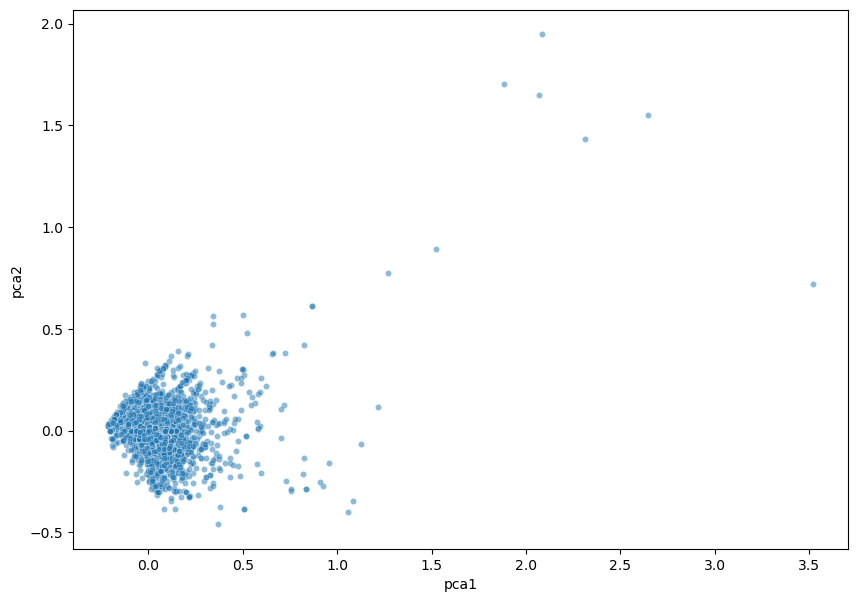

In [24]:
# plot pca
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='pca1',
    y='pca2',
    data=df,
    legend='brief',
    ax=ax,
    alpha=0.5,
    s=20
)

In [ ]:
# do tsne on D matrix
from sklearn.manifold import TSNE

D = pd.DataFrame(np.load('dist_matrix.npy'))
ts = TSNE(metric='precomputed', init='random').fit_transform(D)

# add tsne coordinates to df
df = df.join(pd.DataFrame(ts, columns=('tsnex', 'tsney')))

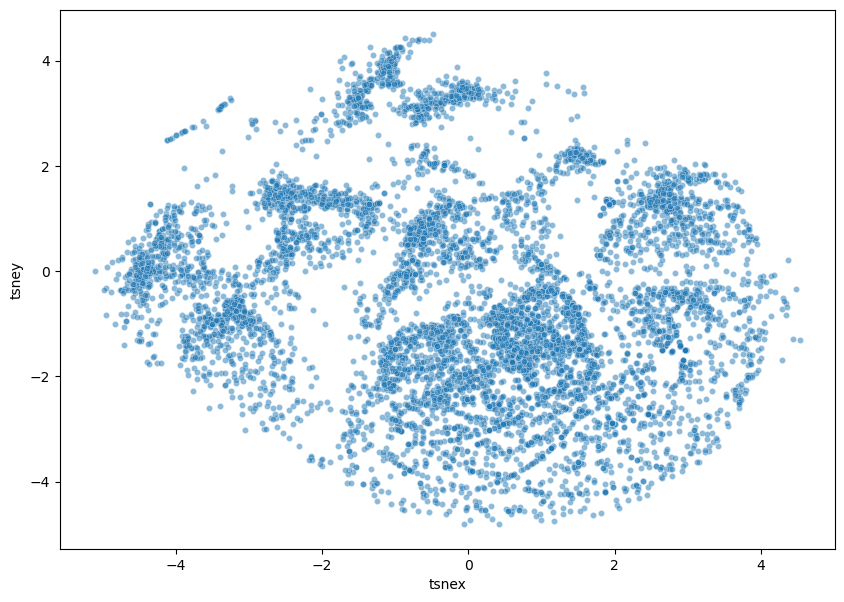

In [29]:
# plot tsne
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='tsnex',
    y='tsney',
    data=df,
    legend='brief',
    ax=ax,
    alpha=0.5,
    s=20
)

In [ ]:
# plot umap from D matrix
import umap

umap_coord = umap.UMAP(metric='precomputed').fit_transform(D)

df = df.join(pd.DataFrame(umap_coord, columns=('umap1', 'umap2')))

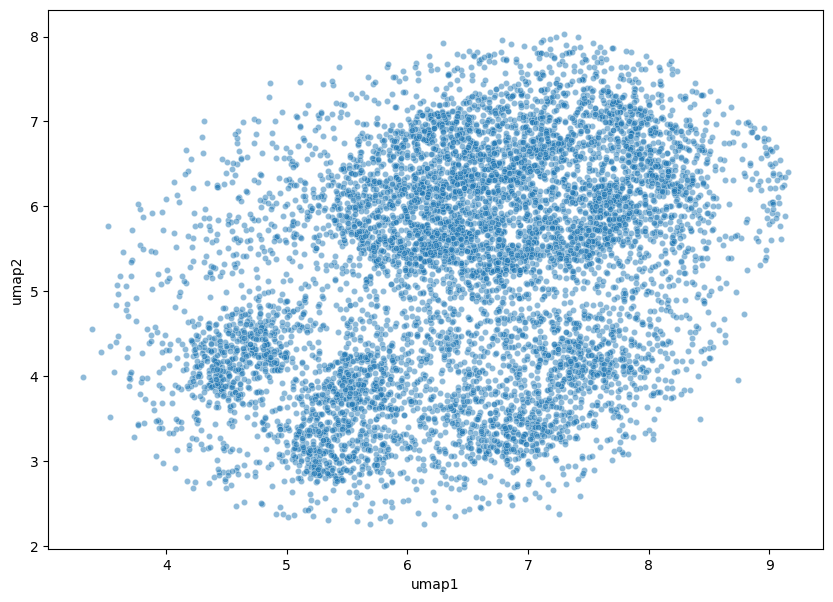

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='umap1',
    y='umap2',
    data=df,
    legend='brief',
    ax=ax,
    alpha=0.5,
    s=20
)


In [ ]:
# do MDS on D matrix
from sklearn.manifold import MDS

mds = MDS(metric='precomputed', n_init=10, max_iter=1000)
mds_coord = mds.fit_transform(D)

df = df.join(pd.DataFrame(mds_coord, columns=('mds1', 'mds2')))

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='mds1',
    y='mds2',
    data=df,
    legend='brief',
    ax=ax,
    alpha=0.5,
    s=20
)

In [31]:
df.head()

Mol    Source     MQN_1  \
0  <rdkit.Chem.rdchem.Mol object at 0x7f2b60061170>  DrugBank  0.417021   
1  <rdkit.Chem.rdchem.Mol object at 0x7f2b600611f0>  DrugBank  0.251064   
2  <rdkit.Chem.rdchem.Mol object at 0x7f2b60061070>  DrugBank  0.195745   
3  <rdkit.Chem.rdchem.Mol object at 0x7f2b60061430>  DrugBank  0.297872   
4  <rdkit.Chem.rdchem.Mol object at 0x7f2b60061d70>  DrugBank  0.263830   

   MQN_2     MQN_3  MQN_4  MQN_5     MQN_6  MQN_7     MQN_8  ...  MQN_39  \
0    0.0  0.000000    0.0    0.0  0.000000    0.0  0.291667  ...     0.0   
1    0.0  0.000000    0.0    0.0  0.000000    0.0  0.180556  ...     0.0   
2    0.0  0.000000    0.0    0.0  0.105263    0.0  0.111111  ...     0.0   
3    0.0  0.166667    0.0    0.0  0.000000    0.0  0.208333  ...     0.0   
4    0.0  0.000000    0.0    0.0  0.000000    0.0  0.000000  ...     0.0   

     MQN_40    MQN_41    MQN_42      pca1      pca2     tsnex     tsney  \
0  0.000000  0.000000  0.000000  0.867532  0.612445  0.829446 -2.033640   
1  0.000000  0.035714  0.015625  0.467568  0.256147  0.801614 -2.022273   
2  0.041667  0.000000  0.000000  0.357768  0.148108  0.553715 -1.540895   
3  0.000000  0.035714  0.015625  0.579397  0.180374  0.852035 -2.156354   
4  0.041667  0.000000  0.000000  0.274498  0.235891  1.906613 -3.007452   

      umap1     umap2  
0  8.806521  6.983538  
1  8.429737  3.502851  
2  4.858696  7.454375  
3  8.738656  6.998269  
4  3.644876  5.466471  

[5 rows x 50 columns]

In [61]:
df.drop(columns=['agg'], inplace=True)

In [62]:
# do agglomerative clustering on D matrix
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=10, affinity='precomputed', linkage='complete')
agg.fit(D)

# plot agglomerative clustering
df = df.join(pd.DataFrame(agg.labels_, columns=('agg',)))

In [63]:
# count members of each cluster
df.groupby('agg').count().Mol

agg
0    3041
1     642
2     740
3     447
4     583
5     448
6     409
7     626
8     694
9     283
Name: Mol, dtype: int64

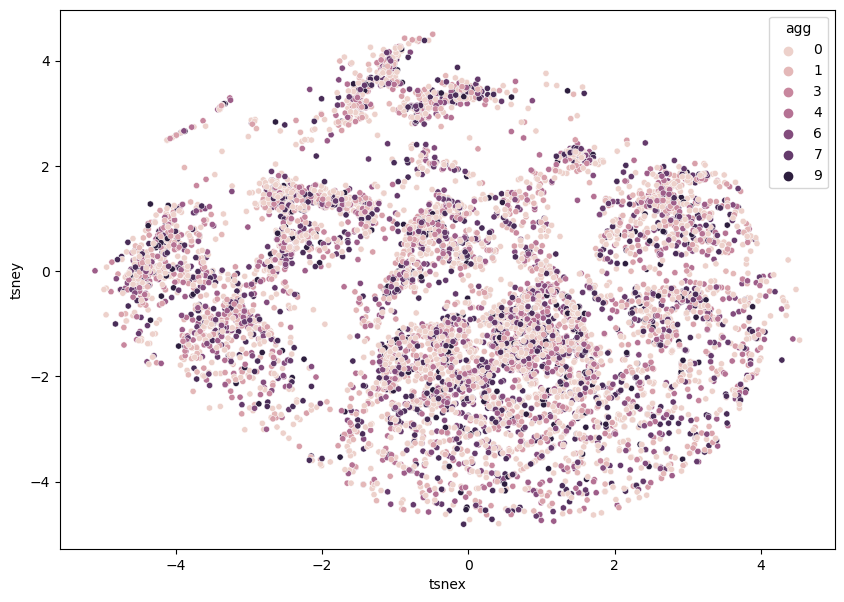

In [64]:
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='tsnex',
    y='tsney',
    data=df,
    legend='brief',
    hue='agg',
    ax=ax,
    alpha=1,
    s=20
)

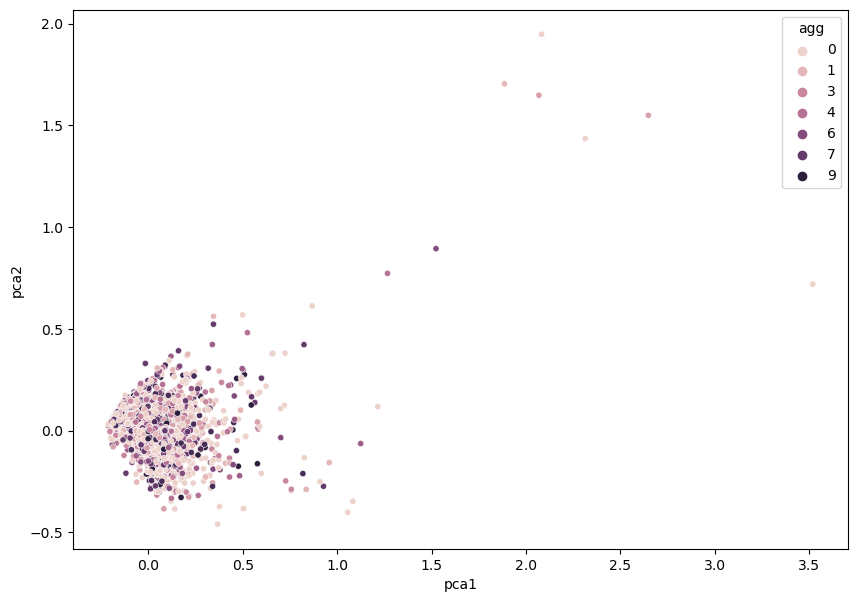

In [65]:
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='pca1',
    y='pca2',
    data=df,
    legend='brief',
    hue='agg',
    ax=ax,
    alpha=1,
    s=20
)

In [70]:
seaborn.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

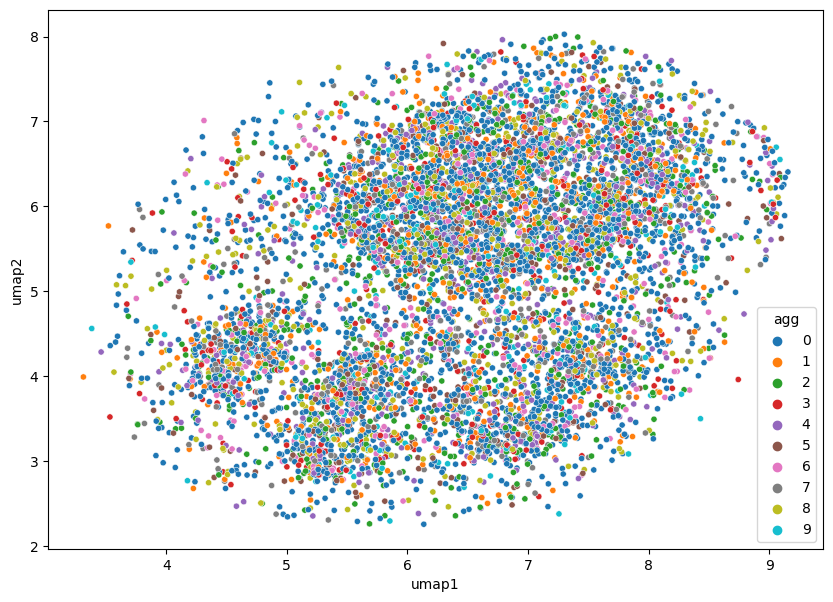

In [75]:
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='umap1',
    y='umap2',
    data=df,
    legend='brief',
    hue='agg',
    ax=ax,
    alpha=1,
    s=20,
    palette=seaborn.color_palette("tab10", 10)
)

In [79]:
# drop k-means columns
df.drop(columns=['kmeans'], inplace=True)

In [80]:
# do kmeans clustering on D matrix
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(D)

In [81]:
# plot kmeans clustering
df = df.join(pd.DataFrame(kmeans.labels_, columns=('kmeans',)))

/home/vmelichar/anaconda3/envs/PNL/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.


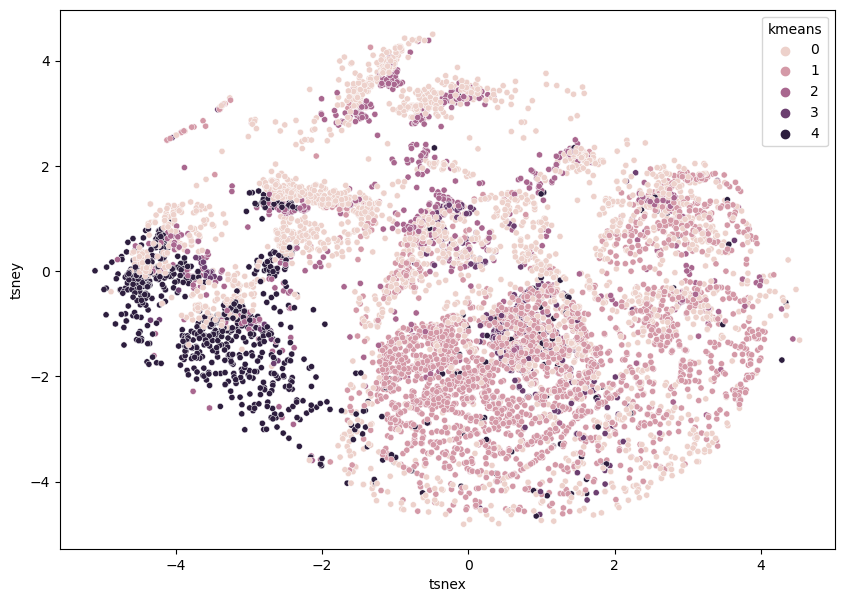

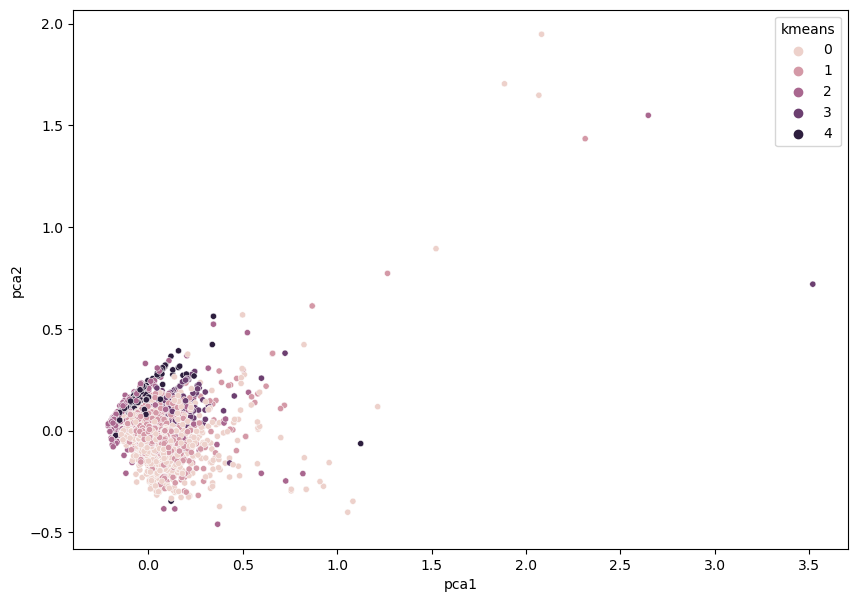

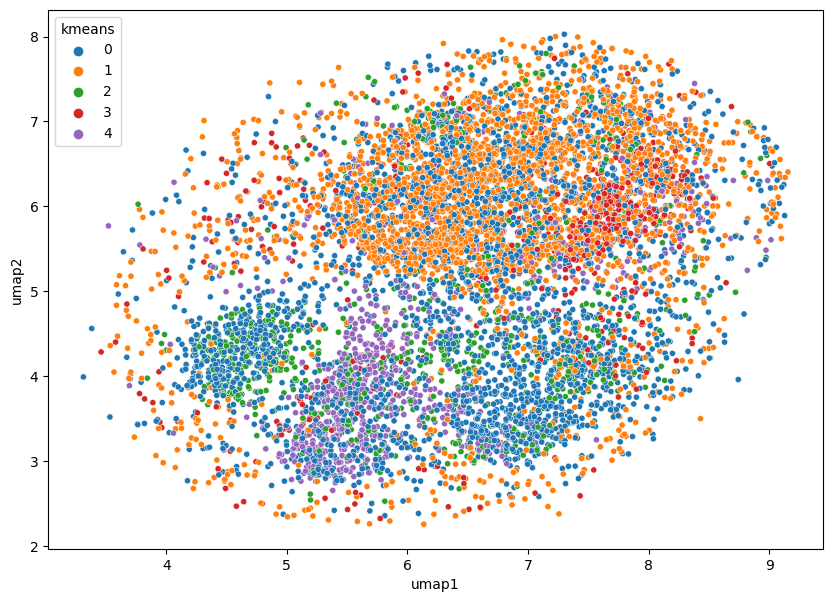

In [82]:
# plot kmeans clustering
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='tsnex',
    y='tsney',
    data=df,
    legend='brief',
    hue='kmeans',
    ax=ax,
    alpha=1,
    s=20
)

fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='pca1',
    y='pca2',
    data=df,
    legend='brief',
    hue='kmeans',
    ax=ax,
    alpha=1,
    s=20
)

fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='umap1',
    y='umap2',
    data=df,
    legend='brief',
    hue='kmeans',
    ax=ax,
    alpha=1,
    s=20,
    palette=seaborn.color_palette("tab10", 10)
)

In [85]:
df.drop(columns=['kmeans_mqn'], inplace=True)

/home/vmelichar/anaconda3/envs/PNL/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.


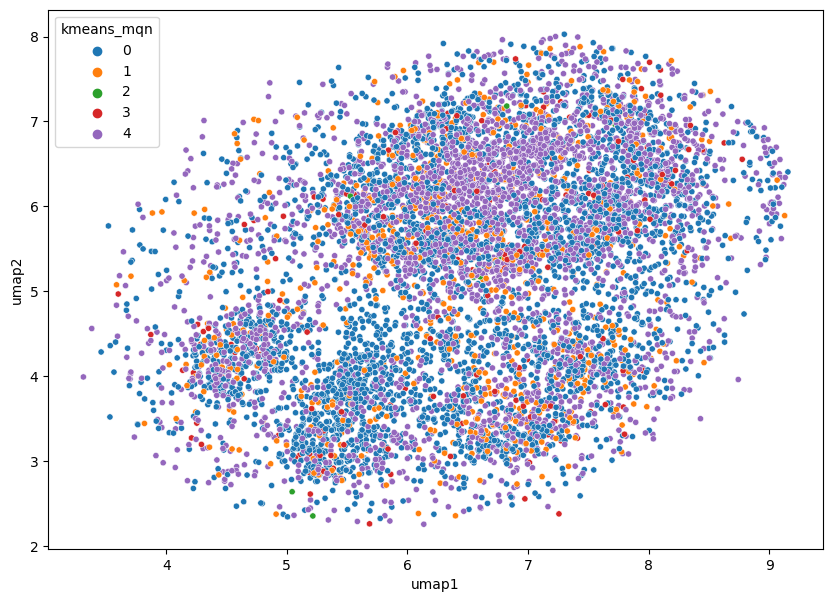

In [86]:
# do kmeans clustering on MQN columns
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(df.loc[:, df.columns.str.startswith('MQN_')])
df = df.join(pd.DataFrame(kmeans.labels_, columns=('kmeans_mqn',)))

# plot kmeans clustering
fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='umap1',
    y='umap2',
    data=df,
    legend='brief',
    hue='kmeans_mqn',
    ax=ax,
    alpha=1,
    s=20,
    palette=seaborn.color_palette("tab10", 10)
)